In [18]:
import numpy as np
from pathlib import Path
from typing import Tuple
import pandas as pd
from ktools.config.dataset import DatasetConfig
from sklearn.metrics.pairwise import rbf_kernel
from matplotlib import pyplot as plt

In [2]:
def mmd_rbf(X, Y, gamma=1.0):
    """Compute MMD with RBF kernel"""
    XX = rbf_kernel(X, X, gamma)
    YY = rbf_kernel(Y, Y, gamma)
    XY = rbf_kernel(X, Y, gamma)
    
    return XX.mean() + YY.mean() - 2 * XY.mean()

In [3]:
DATA_PATH = Path("./data/diabetes_prediction/")
TARGET = "diagnosed_diabetes"

train_data = pd.read_csv(DATA_PATH / "train.csv", index_col=0)
test_data = pd.read_csv(DATA_PATH / "test.csv", index_col=0)

training_col_names = train_data.drop(columns=TARGET).columns.tolist()

numerical_col_names = (
    train_data.drop(columns=TARGET)
    .select_dtypes(include=["number"])
    .columns.tolist()
)
categorical_col_names = train_data.select_dtypes(
    include=["object"]
).columns.tolist()

config = DatasetConfig(
    training_col_names=training_col_names,
    numerical_col_names=numerical_col_names,
    categorical_col_names=categorical_col_names,
    target_col_name=TARGET,
)

In [4]:
train_data

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
id,,,,,,,,,,,,,,,,,,,,,
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0


In [20]:
cutoffs = np.arange(600000, 700000, 1000)

In [22]:
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler


mmd_values = []

for cutoff in tqdm(cutoffs):
    scaler = StandardScaler()
    train = train_data.iloc[:cutoff][config.numerical_col_names].sample(10000).to_numpy()
    val = train_data.iloc[cutoff:][config.numerical_col_names].sample(10000).to_numpy()
    train = scaler.fit_transform(train)
    val = scaler.transform(val)
    value = mmd_rbf(train, val, gamma=0.1)
    print(value)
    mmd_values.append(value)

  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:03<06:17,  3.81s/it]

0.00023149249431236862


  2%|▏         | 2/100 [00:06<05:25,  3.32s/it]

0.0002821358853781486


  3%|▎         | 3/100 [00:09<05:05,  3.15s/it]

0.00025473196489220196


  4%|▍         | 4/100 [00:12<04:57,  3.10s/it]

0.00024572862437474696


  5%|▌         | 5/100 [00:15<04:50,  3.06s/it]

0.0002520028242933292


  6%|▌         | 6/100 [00:18<04:45,  3.03s/it]

0.0002991836492741151


  7%|▋         | 7/100 [00:21<04:43,  3.04s/it]

0.00030384728862065113


  8%|▊         | 8/100 [00:24<04:41,  3.06s/it]

0.00026215907055421317


  9%|▉         | 9/100 [00:27<04:39,  3.07s/it]

0.00028618943658104135


 10%|█         | 10/100 [00:30<04:34,  3.05s/it]

0.0002992798764732407


 11%|█         | 11/100 [00:34<04:30,  3.04s/it]

0.0002657114660730431


 12%|█▏        | 12/100 [00:36<04:25,  3.02s/it]

0.00027122362737708183


 13%|█▎        | 13/100 [00:40<04:22,  3.02s/it]

0.0002453330638101936


 14%|█▍        | 14/100 [00:43<04:19,  3.02s/it]

0.0003082897330780182


 15%|█▌        | 15/100 [00:46<04:16,  3.02s/it]

0.00028942786872571125


 16%|█▌        | 16/100 [00:49<04:12,  3.01s/it]

0.00028745037409666496


 17%|█▋        | 17/100 [00:51<04:09,  3.00s/it]

0.00029385776465307156


 18%|█▊        | 18/100 [00:55<04:06,  3.00s/it]

0.0002889062719703406


 19%|█▉        | 19/100 [00:58<04:03,  3.01s/it]

0.00038347979144832955


 20%|██        | 20/100 [01:01<04:00,  3.01s/it]

0.00026202823789742147


 21%|██        | 21/100 [01:04<03:57,  3.01s/it]

0.00029792538690034953


 22%|██▏       | 22/100 [01:07<03:54,  3.00s/it]

0.00030368048775383794


 23%|██▎       | 23/100 [01:10<03:50,  3.00s/it]

0.00022771218356681944


 24%|██▍       | 24/100 [01:12<03:47,  2.99s/it]

0.000261827947292792


 25%|██▌       | 25/100 [01:15<03:43,  2.99s/it]

0.00034384335860962456


 26%|██▌       | 26/100 [01:18<03:40,  2.98s/it]

0.0002753775887753829


 27%|██▋       | 27/100 [01:21<03:37,  2.98s/it]

0.0003071044855499361


 28%|██▊       | 28/100 [01:24<03:34,  2.98s/it]

0.0002563607056266237


 29%|██▉       | 29/100 [01:27<03:31,  2.98s/it]

0.00031685095418160225


 30%|███       | 30/100 [01:30<03:28,  2.98s/it]

0.0002701313061320987


 31%|███       | 31/100 [01:33<03:26,  2.99s/it]

0.0003760825374451715


 32%|███▏      | 32/100 [01:36<03:23,  2.99s/it]

0.0004240573840440104


 33%|███▎      | 33/100 [01:39<03:20,  3.00s/it]

0.0003372440980094482


 34%|███▍      | 34/100 [01:42<03:17,  2.99s/it]

0.0003243531953123213


 35%|███▌      | 35/100 [01:45<03:14,  3.00s/it]

0.0004139998388776045


 36%|███▌      | 36/100 [01:48<03:11,  2.99s/it]

0.00034551007154207114


 37%|███▋      | 37/100 [01:51<03:08,  2.99s/it]

0.0003027550671474144


 38%|███▊      | 38/100 [01:54<03:06,  3.01s/it]

0.0003333127365951205


 39%|███▉      | 39/100 [01:57<03:03,  3.00s/it]

0.00035730987549631443


 40%|████      | 40/100 [02:00<02:59,  3.00s/it]

0.00040982212774039184


 41%|████      | 41/100 [02:03<02:56,  2.99s/it]

0.00028894749825905675


 42%|████▏     | 42/100 [02:06<02:53,  2.99s/it]

0.0003430682950361086


 43%|████▎     | 43/100 [02:09<02:50,  2.99s/it]

0.0003925426049054409


 44%|████▍     | 44/100 [02:12<02:47,  2.98s/it]

0.00034012176293572727


 45%|████▌     | 45/100 [02:15<02:43,  2.98s/it]

0.0004350631967374452


 46%|████▌     | 46/100 [02:18<02:40,  2.98s/it]

0.00029879505865346156


 47%|████▋     | 47/100 [02:21<02:37,  2.98s/it]

0.0003481082377216338


 48%|████▊     | 48/100 [02:24<02:35,  2.98s/it]

0.00042193776240931347


 49%|████▉     | 49/100 [02:27<02:34,  3.02s/it]

0.00048388680069080814


 50%|█████     | 50/100 [02:30<02:31,  3.03s/it]

0.00048044782697179156


 51%|█████     | 51/100 [02:33<02:27,  3.02s/it]

0.00039950786125411697


 52%|█████▏    | 52/100 [02:36<02:24,  3.01s/it]

0.0004775573406546191


 53%|█████▎    | 53/100 [02:39<02:21,  3.01s/it]

0.0005090052664436795


 54%|█████▍    | 54/100 [02:42<02:18,  3.00s/it]

0.00046800911518039834


 55%|█████▌    | 55/100 [02:45<02:14,  3.00s/it]

0.000492944947435528


 56%|█████▌    | 56/100 [02:48<02:11,  2.99s/it]

0.00042607045968034996


 57%|█████▋    | 57/100 [02:51<02:08,  2.99s/it]

0.0004660099494841613


 58%|█████▊    | 58/100 [02:54<02:05,  2.99s/it]

0.0004364033918925342


 59%|█████▉    | 59/100 [02:57<02:03,  3.00s/it]

0.0004944729968137246


 60%|██████    | 60/100 [03:00<02:00,  3.00s/it]

0.0007982868051296943


 61%|██████    | 61/100 [03:03<01:56,  2.99s/it]

0.00048056902327038575


 62%|██████▏   | 62/100 [03:06<01:53,  2.99s/it]

0.0006522036614691196


 63%|██████▎   | 63/100 [03:09<01:50,  2.99s/it]

0.000636783198228047


 64%|██████▍   | 64/100 [03:12<01:47,  2.99s/it]

0.0006424222019765363


 65%|██████▌   | 65/100 [03:15<01:44,  2.99s/it]

0.0006737325852929493


 66%|██████▌   | 66/100 [03:18<01:41,  2.99s/it]

0.0006559132218486724


 67%|██████▋   | 67/100 [03:21<01:38,  2.98s/it]

0.0006223742378266145


 68%|██████▊   | 68/100 [03:24<01:35,  2.98s/it]

0.0008340145331114796


 69%|██████▉   | 69/100 [03:27<01:32,  2.97s/it]

0.0007317302050406649


 70%|███████   | 70/100 [03:30<01:29,  2.99s/it]

0.00091263273407656


 71%|███████   | 71/100 [03:33<01:26,  2.98s/it]

0.00085747119458357


 72%|███████▏  | 72/100 [03:36<01:23,  2.98s/it]

0.0009571664738824703


 73%|███████▎  | 73/100 [03:39<01:20,  2.98s/it]

0.001048912641783098


 74%|███████▍  | 74/100 [03:42<01:17,  2.98s/it]

0.001098538629805773


 75%|███████▌  | 75/100 [03:45<01:14,  2.98s/it]

0.0009183011927436507


 76%|███████▌  | 76/100 [03:48<01:11,  2.98s/it]

0.0011440487101596758


 77%|███████▋  | 77/100 [03:51<01:08,  2.98s/it]

0.0012626729480486737


 78%|███████▊  | 78/100 [03:54<01:05,  2.98s/it]

0.001248494549875856


 79%|███████▉  | 79/100 [03:57<01:02,  2.98s/it]

0.0014393338134336409


 80%|████████  | 80/100 [04:00<00:59,  2.99s/it]

0.0013142031747001848


 81%|████████  | 81/100 [04:03<00:56,  2.99s/it]

0.0011884741250269282


 82%|████████▏ | 82/100 [04:06<00:53,  3.00s/it]

0.0014471564143215543


 83%|████████▎ | 83/100 [04:09<00:50,  3.00s/it]

0.001393895634818773


 84%|████████▍ | 84/100 [04:12<00:47,  2.99s/it]

0.001281894307784498


 85%|████████▌ | 85/100 [04:15<00:44,  2.99s/it]

0.0013624013183950456


 86%|████████▌ | 86/100 [04:18<00:41,  2.99s/it]

0.0014649822777307447


 87%|████████▋ | 87/100 [04:21<00:38,  2.98s/it]

0.0013255139472251598


 88%|████████▊ | 88/100 [04:24<00:35,  2.98s/it]

0.0014169996894283776


 89%|████████▉ | 89/100 [04:27<00:32,  2.98s/it]

0.001240504943024523


 90%|█████████ | 90/100 [04:30<00:29,  2.99s/it]

0.0013039744633369654


 91%|█████████ | 91/100 [04:33<00:27,  3.00s/it]

0.001298979797171168


ValueError: Cannot take a larger sample than population when 'replace=False'

In [26]:
cutoffs[:len(mmd_values)][np.array(mmd_values) > 0.0014]

array([678000, 681000, 685000, 687000])

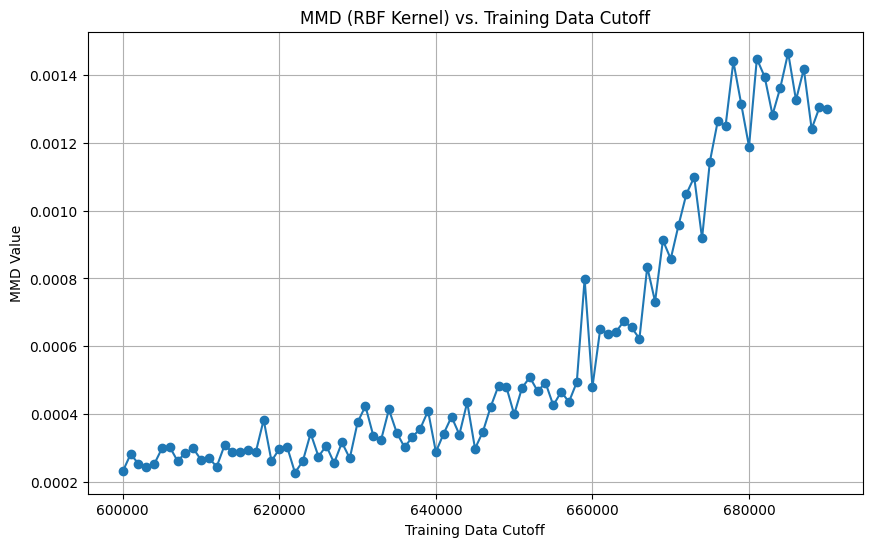

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(cutoffs[:len(mmd_values)], mmd_values, marker='o')
plt.title('MMD (RBF Kernel) vs. Training Data Cutoff')
plt.xlabel('Training Data Cutoff')
plt.ylabel('MMD Value')
plt.grid()
plt.show()

In [16]:
mmd_values

[np.float64(0.00019999935125046325),
 np.float64(0.00019999777864208534),
 np.float64(0.00019999681890183081),
 np.float64(0.00020000025321572935),
 np.float64(0.00020000098969739403),
 np.float64(0.00020000118533051726),
 np.float64(0.00019999972704412523),
 np.float64(0.0001999989752977939),
 np.float64(0.00020000133833474092),
 np.float64(0.00020000693201250504),
 np.float64(0.00019999813377915055),
 np.float64(0.00019999843232883777),
 np.float64(0.00019999941648226347),
 np.float64(0.0002000005699895984),
 np.float64(0.00019999900664519535),
 np.float64(0.00020000066780775634),
 np.float64(0.0001999995134406098),
 np.float64(0.00019999871721154092),
 np.float64(0.0001999985832651502),
 np.float64(0.00019999976839148078),
 np.float64(0.000200001685248906),
 np.float64(0.00020000097468521075),
 np.float64(0.00019999966889394934),
 np.float64(0.00020000008250723096),
 np.float64(0.00019999698962148686),
 np.float64(0.0002000010673639582),
 np.float64(0.00019999789618777516),
 np.floa

In [7]:
mmd_values

[np.float64(0.00019999631249781712),
 np.float64(0.0001999980321281345),
 np.float64(0.0001999955430373501),
 np.float64(0.00020000005659528367),
 np.float64(0.00020000265052368628),
 np.float64(0.00020000193646655808),
 np.float64(0.0001999984791191198),
 np.float64(0.00020000083184371832),
 np.float64(0.00019999700081902762),
 np.float64(0.00019999959905688328)]

In [8]:
config.numerical_col_names

['age',
 'alcohol_consumption_per_week',
 'physical_activity_minutes_per_week',
 'diet_score',
 'sleep_hours_per_day',
 'screen_time_hours_per_day',
 'bmi',
 'waist_to_hip_ratio',
 'systolic_bp',
 'diastolic_bp',
 'heart_rate',
 'cholesterol_total',
 'hdl_cholesterol',
 'ldl_cholesterol',
 'triglycerides',
 'family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history']

In [11]:
from collections import defaultdict
from scipy.stats import ks_2samp


results = defaultdict(list)

for feature in config.numerical_col_names:
    for cutoff in cutoffs:

        train = train_data.iloc[:cutoff][feature].to_numpy()
        val = train_data.iloc[cutoff:][feature].to_numpy()

        statistic, p_value = ks_2samp(train, val)
        results[feature].append(p_value)

        print(f"Feature: {feature}, Cutoff: {cutoff}, KS-pval: {p_value}")

Feature: age, Cutoff: 400000, KS-pval: 0.8316767435379746
Feature: age, Cutoff: 410000, KS-pval: 0.4636630663417275
Feature: age, Cutoff: 420000, KS-pval: 0.5109389668730131
Feature: age, Cutoff: 430000, KS-pval: 0.5080116038495923
Feature: age, Cutoff: 440000, KS-pval: 0.15419983641626867
Feature: age, Cutoff: 450000, KS-pval: 0.17160292637796326
Feature: age, Cutoff: 460000, KS-pval: 0.4722170855930188
Feature: age, Cutoff: 470000, KS-pval: 0.5818645808551886
Feature: age, Cutoff: 480000, KS-pval: 0.4660096459641735
Feature: age, Cutoff: 490000, KS-pval: 0.3264264121358774
Feature: age, Cutoff: 500000, KS-pval: 0.6107449063374935
Feature: age, Cutoff: 510000, KS-pval: 0.7276099435131409
Feature: age, Cutoff: 520000, KS-pval: 0.7888804125630298
Feature: age, Cutoff: 530000, KS-pval: 0.8851146024974967
Feature: age, Cutoff: 540000, KS-pval: 0.6205190672415533
Feature: age, Cutoff: 550000, KS-pval: 0.5172036385851256
Feature: age, Cutoff: 560000, KS-pval: 0.4301762725197291
Feature: age

Feature: age, P-values: [np.float64(0.8316767435379746), np.float64(0.4636630663417275), np.float64(0.5109389668730131), np.float64(0.5080116038495923), np.float64(0.15419983641626867), np.float64(0.17160292637796326), np.float64(0.4722170855930188), np.float64(0.5818645808551886), np.float64(0.4660096459641735), np.float64(0.3264264121358774), np.float64(0.6107449063374935), np.float64(0.7276099435131409), np.float64(0.7888804125630298), np.float64(0.8851146024974967), np.float64(0.6205190672415533), np.float64(0.5172036385851256), np.float64(0.4301762725197291), np.float64(0.3946641132567823), np.float64(0.530231660199036), np.float64(0.4275032740877691), np.float64(0.4183368005118825), np.float64(0.46915057168190555), np.float64(0.6099711180376989), np.float64(0.35504026328918337), np.float64(0.20624279026706427), np.float64(0.3305251152898996), np.float64(0.6306336242955708), np.float64(0.6305293873731506), np.float64(0.23462875923618276), np.float64(0.38802865130594266)]
Feature: 

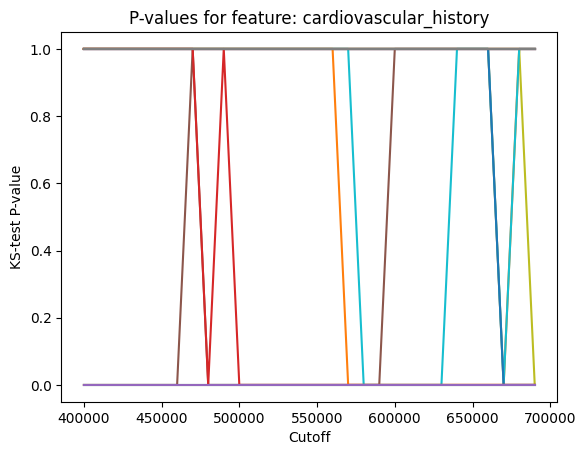

In [14]:
from matplotlib import pyplot as plt


plt.figure()

for feature, p_values in results.items():
    print(f"Feature: {feature}, P-values: {p_values}")

    
    plt.plot(cutoffs, np.array(p_values) > 0.05)
    plt.title(f"P-values for feature: {feature}")
    plt.xlabel("Cutoff")
    plt.ylabel("KS-test P-value")

plt.show()